# maysics.utils模块使用说明

utils模块包含一个类：

|名称|作用|
|---|---|
|A_P|幅-频和相-频分析|

utils模块包含七个函数：

|名称|作用|
|---|---|
|grid_net|生成网格点|
|e_distance|欧氏距离|
|e_distances|欧氏距离|
|m_distance|马氏距离|
|m_distances|马氏距离|
|discrete|绘制离散函数|
|circle|绘制圆|

<br></br>
## A_P：幅-频分析和相-频分析
A_P(X)
<br>```X```是信号的频域表示

### A_P下设三个可调用函数
```fit```：分析函数
<br>```show```：绘图并显示
<br>```savefig```：绘图并保存

### DEMO 1-1：绘制连续函数

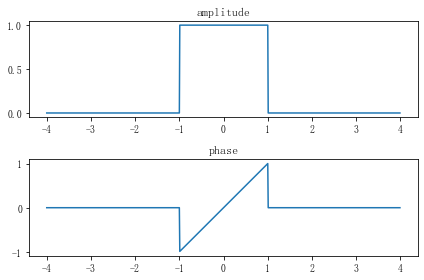

In [4]:
from maysics.utils import A_P
import numpy as np

def H(f):
    y = f
    x = y[abs(y) <= 1]
    y[abs(y) <= 1] = np.e**(1j*x)
    y[abs(y) > 1] = 0
    return y


ap = A_P(H)
f = np.arange(-4, 4, 0.01)
ap.fit(f)
ap.show()

### DEMO 1-2：绘制离散函数

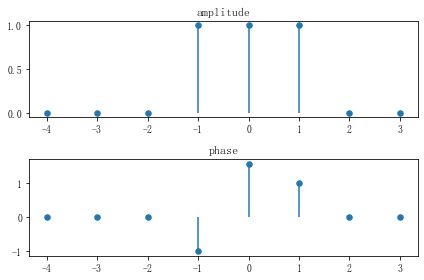

In [5]:
from maysics.utils import A_P
import numpy as np

def H(f):
    y = f
    x = y[abs(y) <= 1]
    y[abs(y) <= 1] = np.e**(1j*x)
    y[abs(y) > 1] = 0
    return y

ap = A_P(H)
f = np.arange(-4, 4, 1)
ap.fit(f)
ap.show('d')

<br></br>
## 网格点：grid_net
可以直接从maysics中调用

<br>grid_net(*args)

### DEMO 2-1：生成网格点 

In [6]:
from maysics import grid_net

grid_net([1, 2], [3, 4])

array([[1, 3],
       [2, 3],
       [1, 4],
       [2, 4]])

<br></br>
## 欧氏距离：e_distance和e_distances
求点与点之间的欧式距离
<br>```e_distance```是求解两个点之间的欧式距离
<br>```e_distances```是求解多个点到目标点之间的欧式距离，目标点默认为坐标原点

<br>e_distance(p1, p2)
<br>e_distances(data, des='o')

### DEMO 3-1：求点(1, 1)到点(3, 3)的欧式距离

In [7]:
from maysics.utils import e_distance

e_distance([1, 1], [3, 3])

2.8284271247461903

### DEMO 3-2：求点集{(1, 1), (1, 2), (2, 2), (2, 3)}到点(1, 0)的欧式距离

In [8]:
from maysics.utils import e_distances

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
e_distances(X, (1, 0))

array([1.        , 2.        , 2.23606798, 3.16227766])

### DEMO 3-3：求点集{(1, 1), (1, 2), (2, 2), (2, 3)}到其中心的欧式距离

In [9]:
from maysics.utils import e_distances

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
e_distances(X, 'mean')

array([1.11803399, 0.5       , 0.5       , 1.11803399])

<br></br>
## 马氏距离：m_distance和m_distances
求点与点之间的马式距离，马氏距离需要以某个点集为基础
<br>```m_distance```是求解两个点之间的马式距离
<br>```m_distances```是求解多个点到目标点之间的马式距离，目标点默认为坐标原点

<br>m_distance(data, p1, p2)
<br>m_distances(data, des='o')

### DEMO 4-1：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求点(1, 1)到点(3, 3)的马式距离

In [10]:
from maysics.utils import m_distance

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
m_distance(X, (1, 1), (3,3))

3.4641016151377544

### DEMO 4-2：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求该点集到点(1, 0)的马式距离

In [11]:
from maysics.utils import m_distances

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
m_distances(X, (1, 0))

array([1.73205081, 3.46410162, 2.44948974, 3.87298335])

### DEMO 4-3：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求该点集到中心的马式距离

In [12]:
from maysics.utils import m_distances

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
m_distances(X, 'mean')

array([1.22474487, 1.22474487, 1.22474487, 1.22474487])

<br></br>
## 绘制离散函数图像：discrete
可以直接从maysics中调用

<br>discrete(x, y, color=None, label=None)

### DEMO 5-1：绘制$sin(\frac{\pi}{8}n)$，$n\in Z$的图像

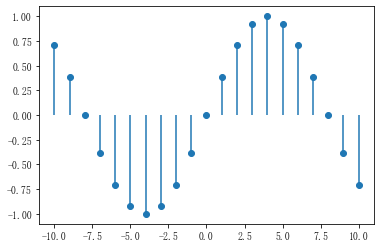

In [13]:
import maysics as ms
import numpy as np

n = np.arange(-10, 11, 1)
y = np.sin(n * np.pi / 8)
ms.discrete(n, y)

<br></br>
## 绘制圆：circle
可以直接从maysics中调用

<br>circle(center=(0, 0), radius=1, angle_range=(0, 2*np.pi), acc=0.01, label=None)
<br>```circle```是圆心坐标
<br>```radius```是圆半径
<br>```angle_range```是绘制的角度范围
<br>```acc```是绘图精度
<br>```label```是图例

### DEMO 6-1：绘制$(x-1)^{2}+(y-2)^{2}=9$的$\frac{1}{4}$圆的图像

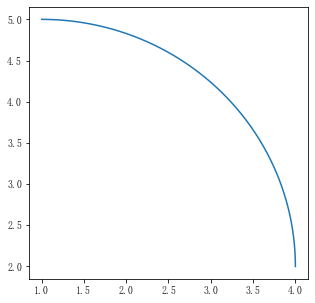

In [14]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5, 5))
ms.circle((1,2), 3, (0, np.pi/2))